In [1]:
from phi.torch.flow import *
from tqdm.notebook import trange
import numpy as np

In [6]:
inflow = Sphere(x=0, y=-0, z=-0.8, radius=0.1)
inflow_rate = 0.2
@jit_compile
def step(v, s, p, dt):
    s = advect.mac_cormack(s, v, dt) + inflow_rate * resample(inflow, to=s, soft=True)
    buoyancy = resample(s * (0, 0, 0.0001), to=v)
    v = advect.semi_lagrangian(v, v, dt) + buoyancy * dt
    v, p = fluid.make_incompressible(velocity=v, obstacles=(), solve=Solve('CG', 1e-3, x0=p))
    return v, s, p

In [7]:
smoke = CenteredGrid(values=0, boundary=ZERO_GRADIENT, bounds=Box(x=(-1, 1), y=(-1, 1), z=(-1, 1)), resolution=spatial(x=30, y=30, z=30))
v0 = StaggeredGrid(values=0, boundary=0, bounds=Box(x=(-1, 1), y=(-1, 1), z=(-1, 1)), resolution=spatial(x=10, y=10, z=10))

<Figure size 1200x500 with 1 Axes>

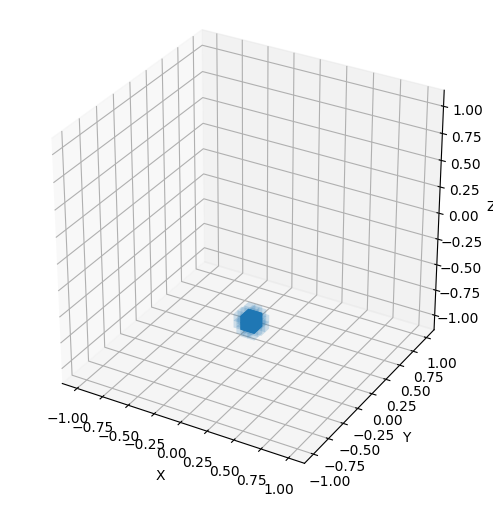

In [8]:
smoke = inflow_rate * resample(inflow, to=smoke, soft=True)
plot(smoke)

In [9]:
v_trj, s_trj, p_trj = iterate(step, batch(time=60), v0, smoke, None, dt=.5, range=trange, substeps=1)
plot(s_trj, animate='time', frame_time=80)

  0%|          | 0/60 [00:00<?, ?it/s]

In [14]:
v_trj, s_trj, p_trj = iterate(step, batch(time=100), v0, smoke, None, dt=.5, range=trange, substeps=3)
plot(s_trj, animate='time', frame_time=80)

  0%|          | 0/100 [00:00<?, ?it/s]

In [6]:
v0 = StaggeredGrid(values=0, bounds=Box(x=(0, 1), y=(0, 1), z=(0, 1)), resolution=spatial(x=3, y=3, z=3),
                   extrapolation=ZERO_GRADIENT)

vx = np.ones((11, 10, 10))
vy = np.ones((10, 11, 10))
vz = np.ones((10, 10, 11))

# v0.staggered_tensor()

for com in v0.vector:
    ntv = com.data.native('x,y,z')
    ntv[0, 0, 0] = 1

for com in v0.vector:
    ntv = com.data.native('x,y,z')
    print(ntv[0, 0, 0])

tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')


In [567]:
vx = tensor(np.zeros((11, 10, 10)), spatial("x,y,z"))
vy = tensor(np.zeros((10, 11, 10)), spatial("x,y,z"))
vz = tensor(np.zeros((10, 10, 11)), spatial("x,y,z"))

v0 = StaggeredGrid(values=1, bounds=Box(x=(0, 1), y=(0, 1), z=(0, 1)), resolution=spatial(x=10, y=10, z=10),
                   extrapolation=ZERO_GRADIENT)
v1 = StaggeredGrid(values=math.stack([vx, vy, vz], dual(vector='x,y,z')), bounds=Box(x=(0, 1), y=(0, 1), z=(0, 1)),
                   resolution=spatial(x=10, y=10, z=10), extrapolation=ZERO_GRADIENT)
print(v0)
print(v1)

Grid faces[(~vectorᵈ=x,y,z, xˢ=~(x=11, y=10, z=10), yˢ=~(x=10, y=11, z=10), zˢ=~(x=10, y=10, z=11)) const 1.0, ext=zero-gradient]
Grid faces[(~vectorᵈ=x,y,z, xˢ=~(x=11, y=10, z=10), yˢ=~(x=10, y=11, z=10), zˢ=~(x=10, y=10, z=11)) const 1.0, ext=zero-gradient]


<Figure size 1200x500 with 2 Axes>

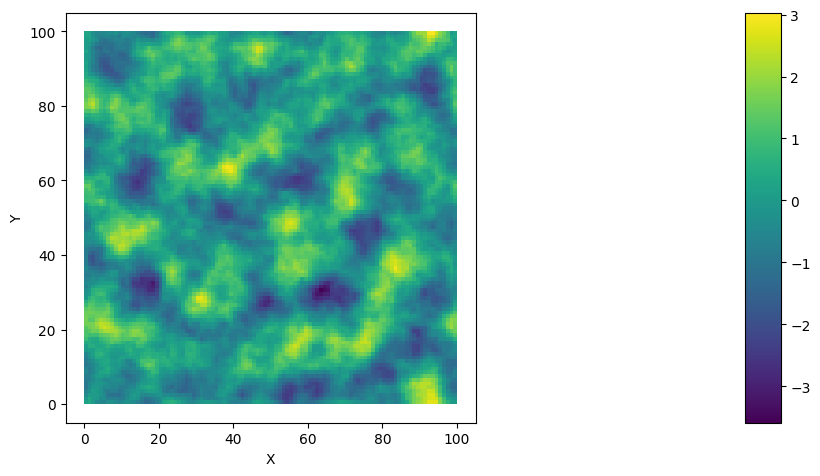

In [564]:
grid = CenteredGrid(x=100, y=100)
grid = field.resample(Noise(), to=grid)
plot(grid)